# Domain : Startup ecosystem

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

# Question 1. Data Warehouse:

> • Read the CSV file

In [2]:
df = pd.read_csv('DS - Part3 - CompanyX_EU.csv')
df

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


# Question 2. Data exploration:

> • Check the datatypes of each attribute.

In [3]:
df.dtypes

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object

> • Check for null values in the attributes.

In [4]:
df[df.isna().any(axis=1)]

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
7,8020 Media,8020media.com,NaN,TC40 2007,Contestant,Operating
8,About Last Night,aboutlastnight.net,NaN,Disrupt NYC 2012,Contestant,Operating
...,...,...,...,...,...,...
648,YOOBIC,yoobic.com,NaN,Disrupt London 2015,Finalist,Operating
651,YourVersion,yourversion.com,NaN,TC50 2009,Audience choice,Operating
652,Yuwan,iyuwan.cn,NaN,Disrupt Beijing 2011,Contestant,Closed
653,ZAP!,zapreklam.com/,NaN,Disrupt EU 2014,Audience choice,Operating


# Question 3.Data preprocessing & visualisation:

>  Drop the null values.

In [5]:
df = df.dropna()
df

,Startup,Product,Funding,Event,Result,OperatingState
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


> • Convert the ‘Funding’ features to a numerical value.

In [6]:
df['val_type'] = df['Funding'].str[-1]
df.loc[df['val_type']=='K','val'] = 1000
df.loc[df['val_type']=='M','val'] = 10**6
df.loc[df['val_type']=='B','val'] = 10**9
df['Funding'] = df['Funding'].str[1:-1].astype(float)*df['val']
df

<ipython-input-6-347b328eb742>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['val_type'] = df['Funding'].str[-1]
C:\Users\shahs\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\shahs\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,Startup,Product,Funding,Event,Result,OperatingState,val_type,val
1,3DLT,3dlt.com,630000.0,Disrupt NYC 2013,Contestant,Closed,K,1000.0
3,3Dprintler,3dprintler.com,1000000.0,Disrupt NY 2016,Audience choice,Operating,M,1000000.0
5,5to1,5to1.com,19300000.0,TC50 2009,Contestant,Acquired,M,1000000.0
6,8 Securities,8securities.com,29000000.0,Disrupt Beijing 2011,Finalist,Operating,M,1000000.0
10,AdhereTech,adheretech.com,1800000.0,Hardware Battlefield 2014,Contestant,Operating,M,1000000.0
...,...,...,...,...,...,...,...,...
657,Zivity,zivity.com,8000000.0,TC40 2007,Contestant,Operating,M,1000000.0
658,Zmorph,zmorph3d.com,1000000.0,-,Audience choice,Operating,M,1000000.0
659,Zocdoc,zocdoc.com,223000000.0,TC40 2007,Contestant,Operating,M,1000000.0
660,Zula,zulaapp.com,3400000.0,Disrupt SF 2013,Audience choice,Operating,M,1000000.0


In [7]:
df[df['val']==10**6]

,Startup,Product,Funding,Event,Result,OperatingState,val_type,val
3,3Dprintler,3dprintler.com,1000000.0,Disrupt NY 2016,Audience choice,Operating,M,1000000.0
5,5to1,5to1.com,19300000.0,TC50 2009,Contestant,Acquired,M,1000000.0
6,8 Securities,8securities.com,29000000.0,Disrupt Beijing 2011,Finalist,Operating,M,1000000.0
10,AdhereTech,adheretech.com,1800000.0,Hardware Battlefield 2014,Contestant,Operating,M,1000000.0
11,AdRocket,adrocket.com,1000000.0,TC50 2008,Contestant,Closed,M,1000000.0
...,...,...,...,...,...,...,...,...
657,Zivity,zivity.com,8000000.0,TC40 2007,Contestant,Operating,M,1000000.0
658,Zmorph,zmorph3d.com,1000000.0,-,Audience choice,Operating,M,1000000.0
659,Zocdoc,zocdoc.com,223000000.0,TC40 2007,Contestant,Operating,M,1000000.0
660,Zula,zulaapp.com,3400000.0,Disrupt SF 2013,Audience choice,Operating,M,1000000.0


> • Plot box plot for funds in million

{'whiskers': [<matplotlib.lines.Line2D at 0x2b5ce5f40d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5ce5f4790>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b5ce5ddd30>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5ce5f4e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5ce6001f0>],
 'means': []}

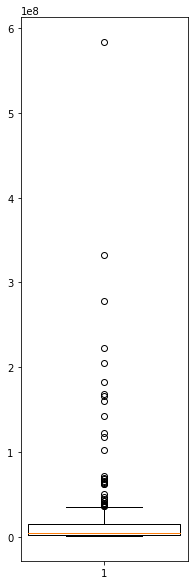

In [8]:
plt.figure(figsize=(3, 10))
plt.boxplot(df[df['val_type']=='M']['Funding'],widths=10)

> • Get the lower fence from the box plot.

In [9]:
#  Upper fence = Q3 + (1.5 * IQR) Lower fence = Q1 — (1.5 * IQR).
Q1=df['Funding'].quantile(0.25)
Q3=df['Funding'].quantile(0.75)
IQR = Q3 - Q1
fil=(df['Funding']>Q1-1.5*IQR)
Q1

745250.0

> • Check number of outliers greater than upper fence

In [10]:
fil = df['Funding']>Q3
df[fil]

,Startup,Product,Funding,Event,Result,OperatingState,val_type,val
5,5to1,5to1.com,19300000.0,TC50 2009,Contestant,Acquired,M,1000000.0
6,8 Securities,8securities.com,29000000.0,Disrupt Beijing 2011,Finalist,Operating,M,1000000.0
16,Aircall,aircall.io,11600000.0,Disrupt SF 2015,Contestant,Operating,M,1000000.0
18,AirHelp,airhelp.com,12200000.0,Disrupt NYC 2014,Contestant,Operating,M,1000000.0
31,Anyclip,anyclip.com,24000000.0,TC50 2009,Finalist,Operating,M,1000000.0
...,...,...,...,...,...,...,...,...
650,YourMechanic,yourmechanic.com,28000000.0,Disrupt SF 2012,Winner,Operating,M,1000000.0
654,ZEFR,zefr.com,62100000.0,Disrupt NYC 2010,Contestant,Operating,M,1000000.0
656,Zenefits,zenefits.com,583600000.0,Disrupt NYC 2013,Finalist,Operating,M,1000000.0
659,Zocdoc,zocdoc.com,223000000.0,TC40 2007,Contestant,Operating,M,1000000.0


>• Drop the values that are greater than upper fence.

In [11]:
fil_df = df.drop(df[fil].index,axis=0)
fil_df

,Startup,Product,Funding,Event,Result,OperatingState,val_type,val
1,3DLT,3dlt.com,630000.0,Disrupt NYC 2013,Contestant,Closed,K,1000.0
3,3Dprintler,3dprintler.com,1000000.0,Disrupt NY 2016,Audience choice,Operating,M,1000000.0
10,AdhereTech,adheretech.com,1800000.0,Hardware Battlefield 2014,Contestant,Operating,M,1000000.0
11,AdRocket,adrocket.com,1000000.0,TC50 2008,Contestant,Closed,M,1000000.0
13,Agrilyst,agrilyst.com,1000000.0,Disrupt SF 2015,Winner,Operating,M,1000000.0
...,...,...,...,...,...,...,...,...
642,Xendo,xendo.com,28000.0,Disrupt SF 2014,Contestant,Acquired,K,1000.0
646,YayPay Inc,yaypay.com,900000.0,Disrupt London 2015,Contestant,Operating,K,1000.0
657,Zivity,zivity.com,8000000.0,TC40 2007,Contestant,Operating,M,1000000.0
658,Zmorph,zmorph3d.com,1000000.0,-,Audience choice,Operating,M,1000000.0


> • Plot the box plot after dropping the values.

{'whiskers': [<matplotlib.lines.Line2D at 0x2b5ce6cfd00>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5ce6de400>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b5ce6cf9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5ce6deac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5ce6dee20>],
 'means': []}

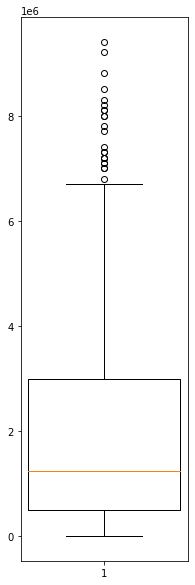

In [12]:
plt.figure(figsize=(3, 10))
plt.boxplot(fil_df['Funding'],widths=10)

> • Check frequency of the OperatingState features classes.

In [13]:
fil_df.groupby(by=['OperatingState']).count()['Startup']

OperatingState
Acquired      41
Closed        51
Operating    242
Name: Startup, dtype: int64

> • Plot a distribution plot for Funds in million.

(array([3.78787879e-07, 2.28475228e-07, 1.74362674e-07, 9.01875902e-08,
        7.21500722e-08, 6.01250601e-08, 5.41125541e-08, 6.61375661e-08,
        4.81000481e-08, 1.80375180e-08]),
 array([1000000., 1840000., 2680000., 3520000., 4360000., 5200000.,
        6040000., 6880000., 7720000., 8560000., 9400000.]),
 <BarContainer object of 10 artists>)

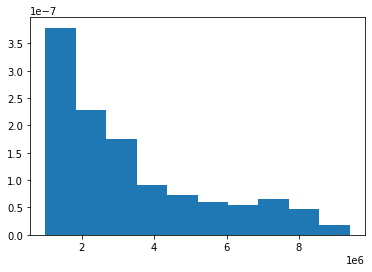

In [14]:
plt.hist(fil_df[fil_df['val_type']=='M']['Funding'],density=1)

> • Plot distribution plots for companies still operating and companies that closed.

(array([4.32251608e-07, 2.16125804e-07, 1.59745159e-07, 8.92693538e-08,
        5.63806445e-08, 5.16822575e-08, 3.75870963e-08, 3.28887093e-08,
        2.81903223e-08, 3.28887093e-08]),
 array([5.0000e+03, 8.8450e+05, 1.7640e+06, 2.6435e+06, 3.5230e+06,
        4.4025e+06, 5.2820e+06, 6.1615e+06, 7.0410e+06, 7.9205e+06,
        8.8000e+06]),
 <BarContainer object of 10 artists>)

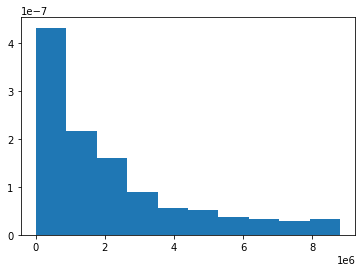

In [15]:
plt.hist(fil_df[fil_df['OperatingState']=='Operating']['Funding'],density=1)

(array([6.61186168e-07, 2.20395389e-07, 9.79535064e-08, 4.89767532e-08,
        7.34651298e-08, 4.89767532e-08, 2.44883766e-08, 0.00000000e+00,
        2.44883766e-08, 4.89767532e-08]),
 array([  93000.,  893700., 1694400., 2495100., 3295800., 4096500.,
        4897200., 5697900., 6498600., 7299300., 8100000.]),
 <BarContainer object of 10 artists>)

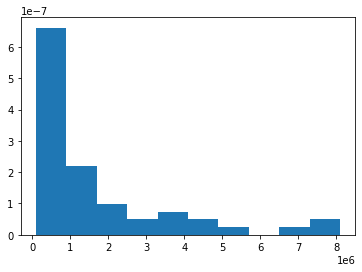

In [16]:
plt.hist(fil_df[fil_df['OperatingState']=='Closed']['Funding'],density=1)

# Question 4. Statistical analysis:

In [17]:
%matplotlib inline
np.random.seed(8)
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

In [18]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.displot(inp)
    plt.axvline(np.mean(inp),color="k",linestyle="dashed",linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ /10,
        "Mean: {:2f}".format(inp.mean()),
    )
    return plt.figure

> • Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?
    Write the null hypothesis and alternative hypothesis.
    Test for significance and conclusion

In [19]:
fil_df[fil_df['OperatingState']=='Operating']['Funding'],

(3      1000000.0
 10     1800000.0
 13     1000000.0
 14      750000.0
 15       17900.0
          ...    
 635      50000.0
 646     900000.0
 657    8000000.0
 658    1000000.0
 660    3400000.0
 Name: Funding, Length: 242, dtype: float64,)

In [20]:
len(fil_df['OperatingState']=='Operating')

334

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

<Figure size 1440x720 with 0 Axes>

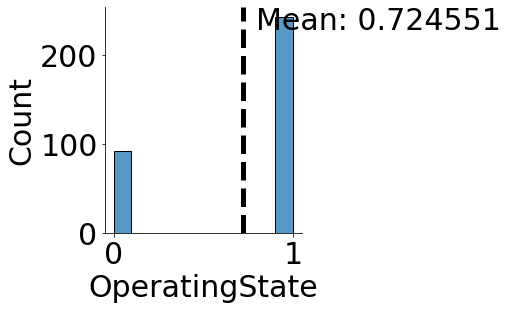

In [21]:
plot_distribution(fil_df['OperatingState']=='Operating')

In [22]:
fil_df[fil_df['OperatingState']=='Closed']['Funding'],

(1       630000.0
 11     1000000.0
 17      929200.0
 20     1900000.0
 34      600000.0
 48      190000.0
 79     8100000.0
 82      325000.0
 97     5500000.0
 107     350000.0
 110     750000.0
 112     475000.0
 115    6700000.0
 126     925000.0
 148    4000000.0
 150     160000.0
 152     300000.0
 170    2400000.0
 178     100000.0
 183    2300000.0
 205     700000.0
 210    1200000.0
 216    1000000.0
 222     191500.0
 227     300000.0
 248     150000.0
 256     500000.0
 295    3000000.0
 317     875000.0
 336    7300000.0
 348    3000000.0
 355    1200000.0
 388    1000000.0
 396     892000.0
 418    3500000.0
 439     150000.0
 443    3500000.0
 489    4100000.0
 490    1100000.0
 503     700000.0
 524     200000.0
 538    1500000.0
 542     600000.0
 548    1800000.0
 564     300000.0
 566     650000.0
 571    4200000.0
 577     280000.0
 583      93000.0
 599     500000.0
 612     800000.0
 Name: Funding, dtype: float64,)

In [23]:
len(fil_df['OperatingState']=='Closed')

334

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

<Figure size 1440x720 with 0 Axes>

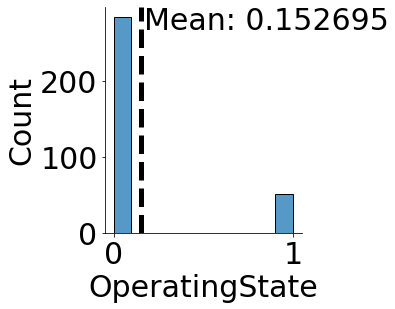

In [24]:
plot_distribution(fil_df['OperatingState']=='Closed')

<Figure size 1440x720 with 0 Axes>

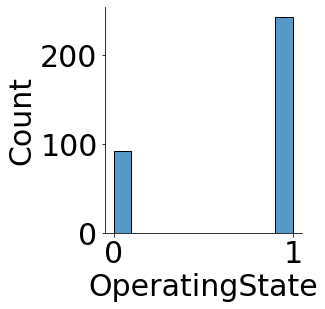

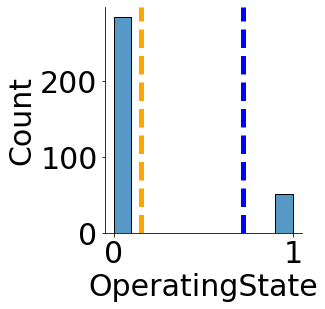

In [25]:
plt.figure()
ax1 = sns.displot(fil_df['OperatingState']=='Operating')
ax2 = sns.displot(fil_df['OperatingState']=='Closed')
plt.axvline(np.mean(fil_df['OperatingState']=='Operating'),color='b',linestyle='dashed',linewidth=5)
plt.axvline(np.mean(fil_df['OperatingState']=='Closed'),color='orange',linestyle='dashed',linewidth=5)

In [26]:
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat,p))
    if p > alpha:
        print('Same distributions(fail to reject H0)')
    else:
        print('Different distrbution (reject H0)')

In [27]:
sample_size = 15
op_Operating = np.random.choice(fil_df['OperatingState']=='Operating', sample_size)
op_Closed = np.random.choice(fil_df['OperatingState']=='Closed', sample_size)
compare_2_groups(op_Operating,op_Closed,0.05,sample_size)

Statistics=3.630, p=0.001
Different distrbution (reject H0)


> • Make a copy of the original data frame.

In [28]:
df = pd.read_csv('DS - Part3 - CompanyX_EU.csv')
df

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


> • Check frequency distribution of Result variable.

In [29]:
result_freq = df.groupby(by=['Result']).count()['Startup']
result_freq

Result
Audience choice     41
Contestant         488
Finalist            84
Runner up           23
Winner              26
Name: Startup, dtype: int64

> • Calculate percentage of winners that are still operating and percentage of contestants that are still operating

In [30]:
winner_operating = df[(df['Result']=='Winner') & ( df['OperatingState'] == 'Operating' )].count()['Startup']
winner_operating/result_freq['Winner']*100

73.07692307692307

In [31]:
contestant_operating = df[(df['Result']=='Contestant') & ( df['OperatingState'] == 'Operating' )].count()['Startup']
contestant_operating/result_freq['Contestant']*100

68.0327868852459

> • Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:
 Write the null hypothesis and alternative hypothesis.
 Test for significance and conclusion

In [32]:
df[(df['Result']=='Winner') & ( df['OperatingState'] == 'Operating' )]

,Startup,Product,Funding,Event,Result,OperatingState
13,Agrilyst,agrilyst.com,$1M,Disrupt SF 2015,Winner,Operating
127,Crate.io,crate.io,$8.1M,Disrupt EU 2014,Winner,Operating
166,Enigma,enigma.io,$34.6M,Disrupt NYC 2013,Winner,Operating
209,Getaround,getaround.com,$103M,Disrupt NYC 2011,Winner,Operating
244,Hello Alfred,helloalfred.com,$12.5M,Disrupt SF 2014,Winner,Operating
280,Jukedeck,jukedeck.com,$3.8M,Disrupt London 2015,Winner,Operating
296,Koto Labs,koto.io,$717K,Hardware Battlefield 2014,Winner,Operating
302,Layer,layer.com,$42.1M,Disrupt SF 2013,Winner,Operating
308,Liquidity Nanotech Corporation,liquico.com,$10.6M,Disrupt NY 2015,Winner,Operating
320,Lock8,lock8.me,NaN,Disrupt EU 2013,Winner,Operating


In [33]:
len((df['Result']=='Winner'))

662

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

<Figure size 1440x720 with 0 Axes>

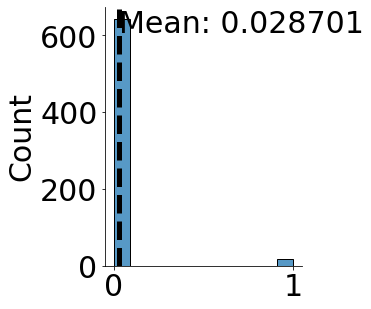

In [34]:
plot_distribution((df['Result']=='Winner') & ( df['OperatingState'] == 'Operating' ))

In [35]:
df[(df['Result']=='Contestant') & ( df['OperatingState'] == 'Operating' )]

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
7,8020 Media,8020media.com,NaN,TC40 2007,Contestant,Operating
8,About Last Night,aboutlastnight.net,NaN,Disrupt NYC 2012,Contestant,Operating
...,...,...,...,...,...,...
649,YouNow,younow.com,$26M,Disrupt SF 2011,Contestant,Operating
654,ZEFR,zefr.com,$62.1M,Disrupt NYC 2010,Contestant,Operating
655,Zello,zello.com,NaN,TC40 2007,Contestant,Operating
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating


In [36]:
len((df['Result']=='Contestant'))

662

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

<Figure size 1440x720 with 0 Axes>

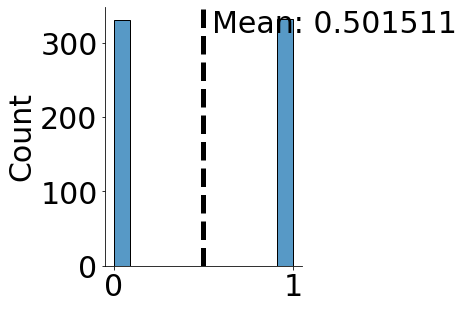

In [37]:
plot_distribution((df['Result']=='Contestant') & ( df['OperatingState'] == 'Operating' ))

<Figure size 1440x720 with 0 Axes>

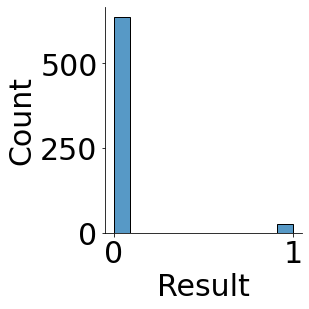

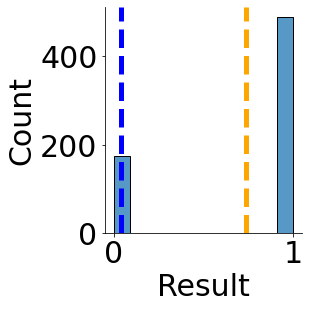

In [38]:
plt.figure()
ax1 = sns.displot(df['Result']=='Winner')
ax2 = sns.displot(df['Result']=='Contestant')
plt.axvline(np.mean(df['Result']=='Winner'),color='b',linestyle='dashed',linewidth=5)
plt.axvline(np.mean(df['Result']=='Contestant'),color='orange',linestyle='dashed',linewidth=5)

In [39]:
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat,p))
    if p > alpha:
        print('Same distributions(fail to reject H0)')
    else:
        print('Different distrbution (reject H0)')

In [40]:
sample_size = 15
op_Operating = np.random.choice(df['Result']=='Winner', sample_size)
op_Closed = np.random.choice(df['Result']=='Contestant', sample_size)
compare_2_groups(op_Operating,op_Closed,0.05,sample_size)

Statistics=-6.205, p=0.000
Different distrbution (reject H0)


> • Check distribution of the Event variable.

In [41]:
df.groupby(by=['Event']).count()['Startup']

Event
-                            13
Disrupt Beijing 2011         18
Disrupt EU 2013              15
Disrupt EU 2014              15
Disrupt London 2015          15
Disrupt London 2016          13
Disrupt NY 2015              26
Disrupt NY 2016              22
Disrupt NYC 2010             22
Disrupt NYC 2011             32
Disrupt NYC 2012             30
Disrupt NYC 2013             31
Disrupt NYC 2014             27
Disrupt SF 2010              26
Disrupt SF 2011              31
Disrupt SF 2012              30
Disrupt SF 2013              31
Disrupt SF 2014              28
Disrupt SF 2015              27
Disrupt SF 2016              26
Hardware Battlefield 2014    14
Hardware Battlefield 2015    15
Hardware Battlefield 2016    13
TC40 2007                    40
TC50 2008                    52
TC50 2009                    50
Name: Startup, dtype: int64

> • Select only the Event that has disrupt keyword from 2013 onwards

In [42]:
df['disrupt_yes'] = df['Event'].str.contains('disrupt',case=False)
df['event_year'] = df['Event'].str[-4:]
df.loc[df['event_year']=='-','event_year'] = 0
df[df['disrupt_yes']&(df['event_year'].astype(int)>2013)]

,Startup,Product,Funding,Event,Result,OperatingState,disrupt_yes,event_year
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating,True,2016
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,True,2016
13,Agrilyst,agrilyst.com,$1M,Disrupt SF 2015,Winner,Operating,True,2015
14,Aiden,aiden.ai,$750K,Disrupt London 2016,Contestant,Operating,True,2016
16,Aircall,aircall.io,$11.6M,Disrupt SF 2015,Contestant,Operating,True,2015
...,...,...,...,...,...,...,...,...
635,Welltwigs,welltwigs.com,$50K,Disrupt NY 2015,Contestant,Operating,True,2015
642,Xendo,xendo.com,$28K,Disrupt SF 2014,Contestant,Acquired,True,2014
646,YayPay Inc,yaypay.com,$900K,Disrupt London 2015,Contestant,Operating,True,2015
648,YOOBIC,yoobic.com,NaN,Disrupt London 2015,Finalist,Operating,True,2015


> • Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from
2013 onwards.
> • Plot the distribution plot comparing the 3 city events.

In [43]:
df['NY']=df['Event'].str.contains('NY',case=False)

In [44]:
df['SF']=df['Event'].str.contains('SF',case=False)

In [45]:
df['EU']=df['Event'].str.contains('EU',case=False)

In [46]:
df['event_year'] = df['Event'].str[-4:]
df.loc[df['event_year']=='-','event_year'] = 0
df[df['NY']&(df['event_year'].astype(int)>2013)]

,Startup,Product,Funding,Event,Result,OperatingState,disrupt_yes,event_year,NY,SF,EU
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,True,2016,True,False,False
18,AirHelp,airhelp.com,$12.2M,Disrupt NYC 2014,Contestant,Operating,True,2014,True,False,False
36,Arctuition,arcsiteapp.com,NaN,Disrupt NY 2015,Contestant,Operating,True,2015,True,False,False
41,"Artveoli, Inc.",artveoli.com,NaN,Disrupt NY 2016,Contestant,Operating,True,2016,True,False,False
50,Bark Technologies,bark.us,NaN,Disrupt NY 2016,Finalist,Operating,True,2016,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
621,VIVE,vive.co,$2.3M,Disrupt NY 2015,Contestant,Operating,True,2015,True,False,False
626,Vurb,vurb.com,$10M,Disrupt NYC 2014,Winner,Acquired,True,2014,True,False,False
629,WaterO,wateropurifier.com,$85.7K,Disrupt NY 2016,Runner up,Operating,True,2016,True,False,False
633,Wellth,wellthapp.com,$2.5M,Disrupt NY 2015,Contestant,Operating,True,2015,True,False,False


In [47]:
len(df[df['NY']&(df['event_year'].astype(int)>2013)])

75

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

<Figure size 1440x720 with 0 Axes>

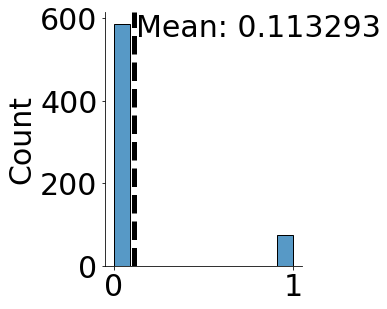

In [48]:
plot_distribution(df['NY']&(df['event_year'].astype(int)>2013))

In [49]:
df['event_year'] = df['Event'].str[-4:]
df.loc[df['event_year']=='-','event_year'] = 0
df[df['SF']&(df['event_year'].astype(int)>2013)]

,Startup,Product,Funding,Event,Result,OperatingState,disrupt_yes,event_year,NY,SF,EU
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating,True,2016,False,True,False
13,Agrilyst,agrilyst.com,$1M,Disrupt SF 2015,Winner,Operating,True,2015,False,True,False
16,Aircall,aircall.io,$11.6M,Disrupt SF 2015,Contestant,Operating,True,2015,False,True,False
23,Allre,allre.com,NaN,Disrupt SF 2014,Contestant,Acquired,True,2014,False,True,False
25,Altwork,altwork.com,NaN,Disrupt SF 2016,Audience choice,Operating,True,2016,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
627,WakaTime,wakatime.com,NaN,Disrupt SF 2015,Contestant,Operating,True,2015,False,True,False
630,WAZER,wazer.com,$1.4M,Disrupt SF 2016,Contestant,Operating,True,2016,False,True,False
631,WEconnect,weconnectrecovery.com,$2.1M,Disrupt SF 2016,Audience choice,Operating,True,2016,False,True,False
634,Wellthy,wellthy.com,$2M,Disrupt SF 2015,Contestant,Operating,True,2015,False,True,False


In [50]:
len(df[df['SF']&(df['event_year'].astype(int)>2013)])

81

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

<Figure size 1440x720 with 0 Axes>

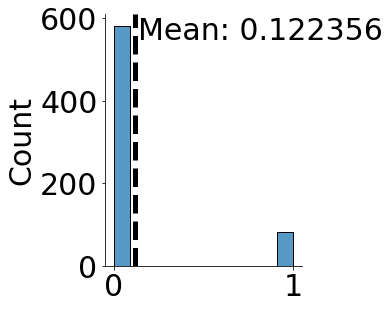

In [51]:
plot_distribution(df['SF']&(df['event_year'].astype(int)>2013))

In [52]:
df['event_year'] = df['Event'].str[-4:]
df.loc[df['event_year']=='-','event_year'] = 0
df[df['EU']&(df['event_year'].astype(int)>2013)]

,Startup,Product,Funding,Event,Result,OperatingState,disrupt_yes,event_year,NY,SF,EU
93,CareZapp,carezapp.com,NaN,Disrupt EU 2014,Contestant,Operating,True,2014,False,False,True
124,CosmEthics,cosmethics.com,$411.5K,Disrupt EU 2014,Contestant,Operating,True,2014,False,False,True
127,Crate.io,crate.io,$8.1M,Disrupt EU 2014,Winner,Operating,True,2014,False,False,True
145,Disease Diagnostic Group,diseasediagnostic.com,$1.3M,Disrupt EU 2014,Runner up,Operating,True,2014,False,False,True
212,giftgaming,giftgaming.com,$334.6K,Disrupt EU 2014,Contestant,Operating,True,2014,False,False,True
266,Instant API Inc.,instantapi.com,$355K,Disrupt EU 2014,Contestant,Operating,True,2014,False,False,True
306,Levebee,levebee.com,NaN,Disrupt EU 2014,Contestant,Operating,True,2014,False,False,True
316,Lobster,lobster.media,$2M,Disrupt EU 2014,Contestant,Operating,True,2014,False,False,True
342,MicroBlink,microblink.com,NaN,Disrupt EU 2014,Finalist,Operating,True,2014,False,False,True
379,NUMBER26,n26.com,$10.7M,Disrupt EU 2014,Contestant,Operating,True,2014,False,False,True


In [53]:
len(df[df['EU']&(df['event_year'].astype(int)>2013)])

15

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

<Figure size 1440x720 with 0 Axes>

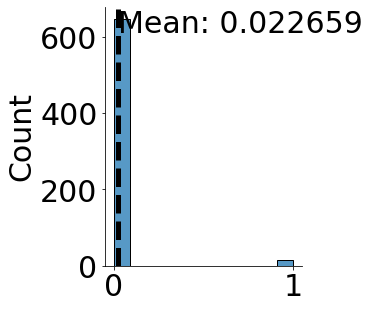

In [54]:
plot_distribution(df['EU']&(df['event_year'].astype(int)>2013))

<Figure size 1440x720 with 0 Axes>

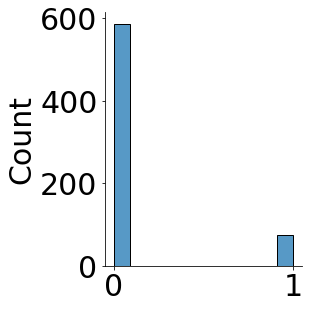

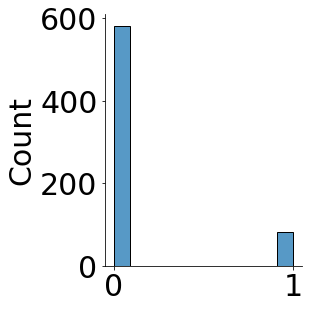

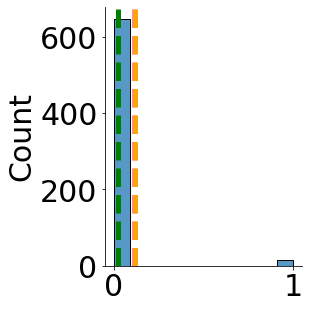

In [55]:
plt.figure()
ax1 = sns.displot(df['NY']&(df['event_year'].astype(int)>2013))
ax2 = sns.displot(df['SF']&(df['event_year'].astype(int)>2013))
ax3 = sns.displot(df['EU']&(df['event_year'].astype(int)>2013))                
plt.axvline(np.mean(df['NY']&(df['event_year'].astype(int)>2013)),color='violet',linestyle='dashed',linewidth=5)
plt.axvline(np.mean(df['SF']&(df['event_year'].astype(int)>2013)),color='orange',linestyle='dashed',linewidth=5)
plt.axvline(np.mean(df['EU']&(df['event_year'].astype(int)>2013)),color='green',linestyle='dashed',linewidth=5)

# Question 5

## Write your observations on improvements or suggestions on quality, quantity, variety, velocity, veracity etc. on the data points collected to perform a better data analysis.

> No as per my Knowledge this much of data is eoungh as a biginner there should not be moe improvements to be done for the starting level of point